# DATA PREPARATION

In [1]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Dataframe untuk data banjir 2018-2020

range_tahun = range(2018, 2021)
dfbanjir = {}
for tahun in range_tahun:
    file_path = f"D:/User/Documents/Berkas Lamaran/Recruitment Test/JSC/Data Kejadian Bencana Banjir di Provinsi DKI Jakarta Tahun {tahun}.xlsx"
    dfbanjir[tahun] = pd.read_excel(file_path)

# Menampilkan salah satu dataframe

dfbanjir[2020].head(3)

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,periode_data
0,Jakarta Barat,KALIDERES,TEGAL ALUR,"RW 03, 04, 11, 12, 15",5,5,302.0,1208,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,1208,10,0,0,202001
1,Jakarta Barat,KEBON JERUK,DURI KEPA,"'RW 02, 03, 04, 05, 09, 13, 14",7,7,60.0,130,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,130,4,0,0,202001
2,Jakarta Barat,KEBON JERUK,KEDOYA SELATAN,"RW 01, 04, 05",3,3,9.0,36,10 s/d 150 cm,"tgl. 01, 27 Januari",0,0,0,0,36,1,0,0,202001


In [3]:
# Menggabungkan dataframe banjir 2018 sd 2020

df_2018sd2020 = pd.concat(dfbanjir.values(), ignore_index=True)
df_2018sd2020.head(3)

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,periode_data
0,Jakarta Pusat,KEC. SAWAH BESAR,KEL. GUNUNG SAHARI UTARA,1,1,3,0.0,0,10 s/d 40 cm,tgl. 29,0,0,0,0,0,0,0,0,201810
1,Jakarta Barat,KEC. CENGKARENG,KEL. RAWA BUAYA,"03, 11",2,3,0.0,0,20 S/D 30,tgl. 29,0,0,0,0,0,0,0,0,201810
2,Jakarta Timur,KEC. JATINEGARA,KEL. KAMPUNG MELAYU,"04, 05",4,21,212.0,711,30 s/d 80 cm,"tgl. 23, 29",0,0,0,0,0,0,0,0,201810


In [4]:
# Membuat kolom baru bernama 'jumlah_korban_luka'

df_2018sd2020["jumlah_luka_berat"] = pd.to_numeric(df_2018sd2020["jumlah_luka_berat"], errors="coerce").fillna(0).astype(int)
df_2018sd2020["jumlah_luka_ringan"] = pd.to_numeric(df_2018sd2020["jumlah_luka_ringan"], errors="coerce").fillna(0).astype(int)
df_2018sd2020["jumlah_korban_luka"] = df_2018sd2020["jumlah_luka_berat"].fillna(0) + df_2018sd2020["jumlah_luka_ringan"].fillna(0)

# Cek hasilnya

jumlah_korban = df_2018sd2020[df_2018sd2020["jumlah_korban_luka"] > 0]
jumlah_korban.head(3)

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,periode_data,jumlah_korban_luka
18,Jakarta Utara,CILINCING,SUKAPURA,"01, 10",2,8,7.0,30,10 s/d 50 cm,"tgl. 15, 16",0,0,0,0,30,1,0,0,201802,30
19,Jakarta Utara,KELAPA GADING,PEGANGSAAN DUA,3,1,1,30.0,100,60 s/d 70 cm,"tgl. 15, 16",0,0,0,0,100,1,0,0,201802,100
20,Jakarta Utara,KOJA,TUGU SELATAN,4,1,2,38.0,140,40 cm,"tgl. 15, 16",0,0,0,0,140,1,0,0,201802,140


In [5]:
# Dataframe untuk data banjir 2023 dan 2024

dfbanjir2023 = pd.read_excel("D:/User/Documents/Berkas Lamaran/Recruitment Test/JSC/Data Kejadian Bencana Banjir Tahun 2023.xlsx")
dfbanjir2024 = pd.read_excel("D:/User/Documents/Berkas Lamaran/Recruitment Test/JSC/Data Kejadian Bencana Banjir Tahun 2024.xlsx")

dfbanjir2024.head(3)

,periode_data,kota_administrasi,kecamatan,kelurahan,ketinggian_air,jumlah_terdampak_rw,jumlah_terdampak_kk,jumlah_terdampak_jiwa,jumlah_kejadian,jumlah_meninggal,jumlah_korban_luka,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,202406,KOTA ADM. JAKARTA UTARA,PENJARINGAN,PLUIT,10 s.d 60 cm,1,0,0,12,0,0,0,0,0
1,202403,kota adm. jakarta barat,cengkareng,cengkareng timur,30 s.d 40 cm,2,0,0,2,0,0,0,0,0
2,202403,kota adm. jakarta barat,kembangan,joglo,30 s.d 40 cm,1,0,0,1,0,0,0,0,0


In [6]:
# Menggabungkan dataframe data banjir tahun 2018-2020 dengan dataframe data banjir tahun 2023-2024

df_banjir_all = pd.concat([df_2018sd2020, dfbanjir2023, dfbanjir2024], ignore_index=True)
df_banjir_all.tail(3)

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,...,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,periode_data,jumlah_korban_luka,jumlah_kejadian
1655,KOTA ADM. JAKARTA SELATAN,MAMPANG PRAPATAN,TEGAL PARANG,NaN,1,NaN,0,0,40 cm,NaN,...,0,NaN,NaN,NaN,0,0,0,202409,0,1
1656,KOTA ADM. JAKARTA TIMUR,JATINEGARA,CIPINANG MUARA,NaN,1,NaN,0,0,30 s.d 40 cm,NaN,...,0,NaN,NaN,NaN,0,0,0,202409,0,1
1657,KOTA ADM. JAKARTA TIMUR,CIPAYUNG,LUBANG BUAYA,NaN,2,NaN,50,250,30 s.d 90 cm,NaN,...,0,NaN,NaN,NaN,0,0,0,202409,0,5


In [7]:
# Menampilkan tipe data kolom

print(f'Jumlah baris di dataset adalah : {df_banjir_all.shape[0]}\nJumlah kolom di dataset adalah : {df_banjir_all.shape[1]}\n')
df_banjir_all.info()

Jumlah baris di dataset adalah : 1658
Jumlah kolom di dataset adalah : 21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   kota_administrasi           1658 non-null   object 
 1   kecamatan                   1658 non-null   object 
 2   kelurahan                   1658 non-null   object 
 3   rw                          1204 non-null   object 
 4   jumlah_terdampak_rw         1658 non-null   object 
 5   jumlah_terdampak_rt         1204 non-null   float64
 6   jumlah_terdampak_kk         1657 non-null   object 
 7   jumlah_terdampak_jiwa       1658 non-null   object 
 8   ketinggian_air              1658 non-null   object 
 9   tanggal_kejadian            1204 non-null   object 
 10  lama_genangan               1204 non-null   float64
 11  jumlah_meninggal            1658 non-null   object 
 12  jumlah_hilang  

In [8]:
# Menampilkan data unik setiap kolom beserta jumlahnya

listItem = []
for col in df_banjir_all.columns :
    listItem.append([col, df_banjir_all[col].dtype, df_banjir_all[col].isna().sum(), round((df_banjir_all[col].isna().sum()/len(df_banjir_all[col])) * 100,2),
                    df_banjir_all[col].nunique(), list(df_banjir_all[col].drop_duplicates().values)]);

df_banjir_all_Desc = pd.DataFrame(columns=['Kolom', 'Tipe', 'Data_kosong', 'Data_Kosong_%', 'Jumlah_Unik', 'Data_Unik_Sampel'],
                     data=listItem)

pd.set_option('display.max_colwidth', 80)
df_banjir_all_Desc

,Kolom,Tipe,Data_kosong,Data_Kosong_%,Jumlah_Unik,Data_Unik_Sampel
0,kota_administrasi,object,0,0.00,23,"[Jakarta Pusat, Jakarta Barat, Jakarta Timur, Jakarta Utara, Jakarta Selatan..."
1,kecamatan,object,0,0.00,118,"[KEC. SAWAH BESAR, KEC. CENGKARENG, KEC. JATINEGARA, KEC. KRAMAT JATI, PENJA..."
2,kelurahan,object,0,0.00,421,"[KEL. GUNUNG SAHARI UTARA, KEL. RAWA BUAYA, KEL. KAMPUNG MELAYU, KEL. BIDARA..."
3,rw,object,454,27.38,474,"[1, 03, 11, 04, 05, 07, 11, 01, 02, 03, 05, 01, 04, 1, 4, 7, 3, 4, 5, 6, 02,..."
4,jumlah_terdampak_rw,object,0,0.00,18,"[1, 2, 4, 9, 3, 16, 14, 6, 5, 7, 8, 11, 12, 10, 13, 15, 0, -]"
5,jumlah_terdampak_rt,float64,454,27.38,44,"[3.0, 21.0, 4.0, 8.0, 12.0, 2.0, 1.0, 7.0, 6.0, 5.0, 143.0, 47.0, 15.0, 13.0..."
6,jumlah_terdampak_kk,object,1,0.06,181,"[0.0, 212.0, 175.0, 7.0, 30.0, 38.0, 98.0, 600.0, 464.0, 324.0, 540.0, 113.0..."
7,jumlah_terdampak_jiwa,object,0,0.00,242,"[0, 711, 290, 30, 100, 140, 480, 2993, 1509, 962, 2347, 265, 414, 20, 60, 63..."
8,ketinggian_air,object,0,0.00,374,"[10 s/d 40 cm, 20 S/D 30, 30 s/d 80 cm, 50 s/d 60 cm, 10 s/d 50 cm, 20 s/d 3..."
9,tanggal_kejadian,object,454,27.38,300,"[tgl. 29, tgl. 23, 29, tgl. 02, tgl. 03, 04, 05, 18, 31, tgl. 03, tgl. 18, t..."


# DATA CLEANING

## Kolom "kota_administrasi"

In [9]:
df_banjir_all["kota_administrasi"].unique()

array(['Jakarta Pusat', 'Jakarta Barat', 'Jakarta Timur', 'Jakarta Utara',
       'Jakarta Selatan', 'Jakarta Urata', 'Kepulauan Seribu',
       'JAKARTA SELATAN', 'JAKARTA TIMUR', 'KEPULAUAN SERIBU',
       'JAKARTA PUSAT', 'JAKARTA UTARA', 'JAKARTA BARAT', '-',
       'KOTA ADM. JAKARTA UTARA', 'kota adm. jakarta barat',
       'kota adm. jakarta selatan', 'KOTA ADM. JAKARTA BARAT',
       'KOTA ADM. JAKARTA TIMUR', 'KOTA ADM. JAKARTA SELATAN',
       'KAB. ADM. KEP. SERIBU', 'kota adm. jakarta timur',
       'kota adm. jakarta utara'], dtype=object)

In [10]:
# Koreksi data kolom "kota_administrasi"

df_banjir_all["kota_administrasi"] = df_banjir_all["kota_administrasi"].str.lower()
df_banjir_all["kota_administrasi"] = df_banjir_all["kota_administrasi"].str.strip()
df_banjir_all["kota_administrasi"] = df_banjir_all["kota_administrasi"].str.replace("kota adm. ", "", case=False)
df_banjir_all["kota_administrasi"] = df_banjir_all["kota_administrasi"].str.replace("kab. adm. ", "", case=False)
df_banjir_all["kota_administrasi"] = df_banjir_all["kota_administrasi"].str.replace("kep. seribu", "kepulauan seribu", case=False)
df_banjir_all["kota_administrasi"] = df_banjir_all["kota_administrasi"].str.replace("jakarta urata", "jakarta utara", case=False)

In [11]:
# Cek data kosong kolom "kota_administrasi"

kota_administrasi_salah = df_banjir_all[df_banjir_all["kota_administrasi"] == "-"]
kota_administrasi_salah

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,...,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,periode_data,jumlah_korban_luka,jumlah_kejadian
1267,-,-,-,NaN,-,NaN,-,-,-,NaN,...,-,NaN,NaN,NaN,-,-,-,202309,-,-
1268,-,-,-,NaN,-,NaN,-,-,-,NaN,...,-,NaN,NaN,NaN,-,-,-,202309,-,-


In [12]:
# Hapus data kosong kolom "kota_administrasi"

kota_administrasi_salah = df_banjir_all[df_banjir_all["kota_administrasi"] == "-"].index
df_banjir_all.drop(kota_administrasi_salah , inplace=True)

df_banjir_all.reset_index(drop=True, inplace=True)
df_banjir_all["kota_administrasi"] = df_banjir_all["kota_administrasi"].str.title()

# Cek data unik hasil koreksi

df_banjir_all["kota_administrasi"].unique()

array(['Jakarta Pusat', 'Jakarta Barat', 'Jakarta Timur', 'Jakarta Utara',
       'Jakarta Selatan', 'Kepulauan Seribu'], dtype=object)

## Kolom "kecamatan"

In [13]:
df_banjir_all["kecamatan"].unique()

array(['KEC. SAWAH BESAR', 'KEC. CENGKARENG', 'KEC. JATINEGARA',
       'KEC. KRAMAT JATI', 'PENJARINGAN', 'KALIDERES',
       'GROGOL PETAMBURAN', 'KEMBANGAN', 'CENGKARENG', 'CEMPAKA PUTIH',
       'KEMAYORAN', 'CILINCING', 'KELAPA GADING', 'KOJA', 'KEBON JERUK',
       'PALMERAH', 'CILANDAK', 'PANCORAN', 'PASAR MINGGU', 'TEBET',
       'JAGAKARSA', 'MAMPANG PRAPATAN', 'MATRAMAN', 'KEC. KALIDERES',
       'KEC. PASAR MINGGU', 'KEC. MAMPANG PRAPATAN', 'KEC. PANCORAN',
       'KEC. CILANDAK', 'KEC. KEBAYORAN BARU', 'KEC. TEBET', 'CAKUNG',
       'JATINEGARA', 'MAKASAR', 'KRAMAT JATI', 'PASAR REBO',
       'KEC. KEBAYORAN LAMA', 'PESANGGRAHAN', 'PULOGADUNG',
       'KEC. PENJARINGAN', 'KEC. PESANGGRAHAN', 'KEC. MAKASAR',
       'KEC. CIRACAS', 'KEC. CAKUNG', 'KEC. KEMBANGAN', 'KEC. PASAR REBO',
       'KEC, PASAR MINGGU', 'KEC. MAMPANG', 'KEC. JAGAKARSA',
       'KEC.KRAMAT JATI', 'KEC. KEBON JERUK', 'KEC. PALMERAH',
       'KEC. KALI DERES', 'KEC. CILINCING', 'KEC. KELAPA GADING',
     

In [14]:
# Koreksi data kolom "kecamatan"

df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.lower()
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.strip()
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.replace("KEC. ", "", case=False)
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.replace("KEC.", "", case=False)
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.replace("KEC, ", "", case=False)
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.replace("KEP. ", "kepulauan ", case=False)
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.replace("Ciliincing", "Cilincing", case=False)
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.replace("Jagakarta", "Jagakarsa", case=False)
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.replace("Kali Deres", "Kalideres", case=False)
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.replace("Makassar", "Makasar", case=False)
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.replace("Mampang", "Mampang Prapatan", case=False)
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.replace("Mampang Prapatan Prapatan", "Mampang Prapatan", case=False)
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.replace("Pulogadung", "Pulo Gadung", case=False)
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.replace("Setia Budi", "Setiabudi", case=False)
df_banjir_all["kecamatan"] = df_banjir_all["kecamatan"].str.title()
sorted(df_banjir_all["kecamatan"].unique())

['Cakung',
 'Cempaka Putih',
 'Cengkareng',
 'Cilandak',
 'Cilincing',
 'Cipayung',
 'Ciracas',
 'Duren Sawit',
 'Gambir',
 'Grogol Petamburan',
 'Jagakarsa',
 'Jatinegara',
 'Johar Baru',
 'Kalideres',
 'Kebayoran Baru',
 'Kebayoran Lama',
 'Kebon Jeruk',
 'Kelapa Gading',
 'Kemayoran',
 'Kembangan',
 'Kepulauan Seribu Selatan',
 'Kepulauan Seribu Utara',
 'Koja',
 'Kramat Jati',
 'Makasar',
 'Mampang Prapatan',
 'Matraman',
 'Menteng',
 'Nihil',
 'Pademangan',
 'Palmerah',
 'Pancoran',
 'Pasar Minggu',
 'Pasar Rebo',
 'Penjaringan',
 'Pesanggrahan',
 'Pulo Gadung',
 'Sawah Besar',
 'Senen',
 'Setiabudi',
 'Taman Sari',
 'Tambora',
 'Tanah Abang',
 'Tanjung Priok',
 'Tebet']

In [15]:
# Cek data nihil kolom "kecamatan"

kecamatan_salah = df_banjir_all[df_banjir_all["kecamatan"] == "Nihil"]
kecamatan_salah

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,...,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,periode_data,jumlah_korban_luka,jumlah_kejadian
1230,Kepulauan Seribu,Nihil,nihil,NaN,0,NaN,0,0,0,NaN,...,0,NaN,NaN,NaN,0,0,0,202303,0,0
1231,Jakarta Pusat,Nihil,nihil,NaN,0,NaN,0,0,0,NaN,...,0,NaN,NaN,NaN,0,0,0,202303,0,0
1232,Jakarta Utara,Nihil,nihil,NaN,0,NaN,0,0,0,NaN,...,0,NaN,NaN,NaN,0,0,0,202303,0,0
1274,Kepulauan Seribu,Nihil,nihil,NaN,0,NaN,0,0,0,NaN,...,0,NaN,NaN,NaN,0,0,0,202303,0,0
1275,Jakarta Pusat,Nihil,nihil,NaN,0,NaN,0,0,0,NaN,...,0,NaN,NaN,NaN,0,0,0,202306,0,0
1276,Jakarta Utara,Nihil,nihil,NaN,0,NaN,0,0,0,NaN,...,0,NaN,NaN,NaN,0,0,0,202306,0,0
1283,Kepulauan Seribu,Nihil,nihil,NaN,0,NaN,0,0,0,NaN,...,0,NaN,NaN,NaN,0,0,0,202306,0,0
1284,Jakarta Pusat,Nihil,nihil,NaN,0,NaN,0,0,0,NaN,...,0,NaN,NaN,NaN,0,0,0,202306,0,0
1285,Jakarta Utara,Nihil,nihil,NaN,0,NaN,0,0,0,NaN,...,0,NaN,NaN,NaN,0,0,0,202306,0,0
1309,Kepulauan Seribu,Nihil,nihil,NaN,0,NaN,0,0,0,NaN,...,0,NaN,NaN,NaN,0,0,0,202306,0,0


In [16]:
# Hapus data nihil kolom "kecamatan"

kecamatan_salah = df_banjir_all[df_banjir_all["kecamatan"] == "Nihil"].index
df_banjir_all.drop(kecamatan_salah , inplace=True)
df_banjir_all.reset_index(drop=True, inplace=True)

## Kolom "kelurahan"

In [17]:
df_banjir_all["kelurahan"].unique()

array(['KEL. GUNUNG SAHARI UTARA', 'KEL. RAWA BUAYA',
       'KEL. KAMPUNG MELAYU', 'KEL. BIDARA CINA', 'KEL. CAWANG',
       'KAMAL MUARA', 'KAMAL', 'JELAMBAR BARU', 'JELAMBAR',
       'KEMBANGAN UTARA', 'KAPUK', 'RAWA BUAYA', 'CENGKARENG TIMUR',
       'CEMPAKA PUTIH TIMUR', 'SERDANG', 'PENJARINGAN', 'KAPUK MUARA',
       'SUKAPURA', 'PEGANGSAAN DUA', 'TUGU SELATAN', 'TEGAL ALUR',
       'DURI KOSAMBI', 'CENGKARENG BARAT', 'DURI KEPA', 'WIJAYA KUSUMA',
       'JATI PULO', 'PONDOK LABU', 'PANGADEGAN', 'RAWA JATI',
       'PEJATEN TIMUR', 'KEBON BARU', 'MANGGARAI', 'BUKIT DURI',
       'LENTENG AGUNG', 'SRENGSENG SAWAH', 'BANGKA', 'KEBON MANGGIS',
       'KEL. KAMAL', 'KEL. JATI PADANG', 'KEL. RAGUNAN',
       'KEL. CILANDAK TIMUR', 'KEL. PEJATEN TIMUR', 'KEL. BANGKA',
       'KEL. DUREN TIGA', 'KEL. RAWAJATI', 'KEL. PENGADEGAN',
       'KEL. PONDOK LABU', 'KEL. CIPETE SELATAN', 'KEL. PETOGOGAN',
       'KEL. KEBON BARU', 'KEL. CILILITAN', 'RAWA TERATE', 'CAKUNG BARAT',
       'JATINEG

In [18]:
# Koreksi data kolom "kelurahan"

df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.lower()
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.strip()
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("KEL. ", "", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("KEL.", "", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("KEL, ", "", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("KEL ", "", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.title()
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Balekambang", "Bale Kambang", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Halim Perdana Kusumah", "Halim Perdana Kusuma", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Kalibaru", "Kali Baru", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Kedaung Kaliangke", "Kedaung Kali Angke", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("P.", "Pulau", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Pengadengan", "Pengadegan", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Pulogadung", "Pulo Gadung", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Pulogebang", "Pulo Gebang", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Rambuta", "Rambutan", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Rawajati", "Rawa Jati", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Suka Pura", "Sukapura", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Tanjung Priuk", "Tanjung Priok", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Wijaya Kesuma", "Wijaya Kusuma", case=False)
df_banjir_all["kelurahan"] = df_banjir_all["kelurahan"].str.replace("Tengah", "Kampung Tengah", case=False)

In [19]:
# Cek data null kolom "kelurahan"


df_banjir_all[df_banjir_all["kelurahan"].isna()]

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,...,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,periode_data,jumlah_korban_luka,jumlah_kejadian
1024,Jakarta Selatan,Kebayoran Lama,NaN,RW 14,1,1.0,0.0,0,40 cm,16 Oktober,...,0,0.0,0.0,0.0,0,0,0,201910,0,NaN


In [20]:
# Menghapus data null kolom "kelurahan"

df_banjir_all.dropna(subset=["kelurahan"], inplace=True)
df_banjir_all.reset_index(drop=True, inplace=True)

In [21]:
# Cek hasil koreksi

sorted(df_banjir_all["kecamatan"].unique())

['Cakung',
 'Cempaka Putih',
 'Cengkareng',
 'Cilandak',
 'Cilincing',
 'Cipayung',
 'Ciracas',
 'Duren Sawit',
 'Gambir',
 'Grogol Petamburan',
 'Jagakarsa',
 'Jatinegara',
 'Johar Baru',
 'Kalideres',
 'Kebayoran Baru',
 'Kebayoran Lama',
 'Kebon Jeruk',
 'Kelapa Gading',
 'Kemayoran',
 'Kembangan',
 'Kepulauan Seribu Selatan',
 'Kepulauan Seribu Utara',
 'Koja',
 'Kramat Jati',
 'Makasar',
 'Mampang Prapatan',
 'Matraman',
 'Menteng',
 'Pademangan',
 'Palmerah',
 'Pancoran',
 'Pasar Minggu',
 'Pasar Rebo',
 'Penjaringan',
 'Pesanggrahan',
 'Pulo Gadung',
 'Sawah Besar',
 'Senen',
 'Setiabudi',
 'Taman Sari',
 'Tambora',
 'Tanah Abang',
 'Tanjung Priok',
 'Tebet']

## Kolom "rw", "jumlah_kejadian"

In [22]:
df_banjir_all["rw"].unique()

array([1, '03, 11', '04, 05', '07, 11', '01, 02, 03, 05', '01, 04',
       '1, 4', 7, '3, 4, 5, 6', '02, 05, 06, 07, 09, 12, 13, 15, 16',
       '01, 02', '03, 04, 12, 13', '05, 07, 08', '01, 07', '01, 02, 04',
       '12, 17', '01, 10', 3, 4,
       '01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16',
       '01, 02, 03, 04, 05, 06, 07, 08, 09',
       '01, 02, 03, 04, 05, 06, 07, 09, 10, 11, 12, 13, 15, 16',
       '01, 02, 05, 11', '04, 06, 09, 10, 11, 16', '03, 12, 13, 14, 16',
       '04, 10', '01, 02, 03, 04, 10', '03, 16', 5, '01, 03, 07',
       '05, 06, 07, 08', 10, '10, 11', '02, 03, 04, 06, 07',
       '01, 02, 05, 06, 07, 08, 12', 2, '03, 04', '02, 04, 05, 06, 09',
       '07, 08', '01, 03, 04, 09, 13', '01, 02, 03, 04', '01, 02, 05',
       '01, 02, 03, 07', '04, 05, 07, 08', '01, 02, 03, 05, 08', '06, 07',
       '03, 07, 08', '01, 02, 03, 05, 06, 07, 08, 11, 14',
       '01, 02, 04, 05, 06, 07, 08', '03, 05, 06, 07, 11, 12, 14, 15, 16',
       13, '03, 04, 0

In [23]:
# Menghapus kolom "rw" dan "jumlah_kejadian"

df_banjir_all.drop(columns=["rw", "jumlah_kejadian"], inplace=True)
df_banjir_all.head(3)

,kota_administrasi,kecamatan,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,periode_data,jumlah_korban_luka
0,Jakarta Pusat,Sawah Besar,Gunung Sahari Utara,1,3.0,0.0,0,10 s/d 40 cm,tgl. 29,0.0,0,0.0,0.0,0.0,0,0,0,201810,0
1,Jakarta Barat,Cengkareng,Rawa Buaya,2,3.0,0.0,0,20 S/D 30,tgl. 29,0.0,0,0.0,0.0,0.0,0,0,0,201810,0
2,Jakarta Timur,Jatinegara,Kampung Melayu,4,21.0,212.0,711,30 s/d 80 cm,"tgl. 23, 29",0.0,0,0.0,0.0,0.0,0,0,0,201810,0


## Kolom "jumlah_terdampak_rw", "jumlah_terdampak_rt", "jumlah_terdampak_kk", "jumlah_terdampak_jiwa"

In [24]:
# Daftar Kolom

kolom_ubah = ["jumlah_terdampak_rw", "jumlah_terdampak_rt", "jumlah_terdampak_kk", "jumlah_terdampak_jiwa"]


# Mengubah data menjadi numerik, mengubah data missing value menjadi 0, mengubah tipe data menjadi integer
# Menggunakan astype karena semua data tidak ada berupa bilangan desimal

for kolom in kolom_ubah:
    df_banjir_all[kolom] = pd.to_numeric(df_banjir_all[kolom], errors="coerce").fillna(0).astype(int)

In [25]:
# Cek data unik kolom "jumlah_terdampak_rw"

df_banjir_all["jumlah_terdampak_rw"].unique()

array([ 1,  2,  4,  9,  3, 16, 14,  6,  5,  7,  8, 11, 12, 10, 13, 15,  0])

In [26]:
# Cek data unik pada kolom "jumlah_terdampak_rt" dimana kolom "jumlah_terdampak_rw" berisikan 0

df_banjir_all[df_banjir_all["jumlah_terdampak_rw"] == 0]["jumlah_terdampak_rt"].unique()

array([1])

In [27]:
# Mengubah data 0 menjadi 1 pada kolom "jumlah_terdampak_rw" karena pada kolom "jumlah_terdampak_rt" terdapat data "1"
# Tidak mungkin ada data pada kolom "jumlah_terdampak_rt" tetapi data berisikan 0 pada "jumlah_terdampak_rw"

df_banjir_all["jumlah_terdampak_rw"] = df_banjir_all["jumlah_terdampak_rw"].replace(0, 1)

In [28]:
# Cek data pada kolom "jumlah_terdampak_rt" yang berisikan 0

df_banjir_all[df_banjir_all["jumlah_terdampak_rt"] == 0][["jumlah_terdampak_rw", "jumlah_terdampak_rt"]]

,jumlah_terdampak_rw,jumlah_terdampak_rt
31,1,0
40,5,0
86,5,0
87,2,0
115,1,0
...,...,...
1636,1,0
1637,1,0
1638,1,0
1639,1,0


In [29]:
# Karena kita tidak tahu berapa wilayah RT yang terdampak pada suatu wilayah RW
# Asumsikan setiap suatu wilayah RW yang terdampak maka setidaknya ada satu wilayah RT yang terdampak

df_banjir_all.loc[df_banjir_all["jumlah_terdampak_rt"] == 0, "jumlah_terdampak_rt"] = df_banjir_all.loc[df_banjir_all["jumlah_terdampak_rt"] == 0, "jumlah_terdampak_rw"]

## Kolom "ketinggian_air"

In [30]:
df_banjir_all["ketinggian_air"].unique()

array(['10 s/d 40 cm', '20 S/D 30', '30 s/d 80 cm', '50 s/d 60 cm',
       '10 s/d 50 cm', '20 s/d 30 cm', '10 s/d 25 cm', '15 cm', '20 cm',
       '5 s/d 20 cm', '5 s/d 30 cm', '15 s/d 20 cm', '10 s/d 35 cm',
       '5 s/d 10 cm', '05 s/d 15 cm', '60 s/d 70 cm', '40 cm',
       '30 s/d 50 cm', '5 s/d 60 cm', '10 s/d 80 cm', '15 s/d 30 cm',
       '15 s/d 60 cm', '10 s/d 30 cm', '40 s/d 50 cm', '10 s/d 300 cm',
       '10 s/d 250 cm', '30 s/d 200 cm', '20 s/d 80 cm', '50 s/d 200 cm',
       '100 s/d 300 cm', '30 s/d 40 cm', '10 s/d 120 cm',
       '100 s/d 150 cm', '10 s/d 60 cm', '30 s/d 60 cm', '20 s/d 40 cm',
       '10 s/d 20 cm', '10 s/d 100 cm', '70 s/d 110 cm', '10 s/d 70 cm',
       '30 s/d 70 cm', '10 s/d 220 cm', '20 s/d 90 cm', '20 s/d 50 cm',
       '20 s/d 270 cm', '30 s/d 250 cm', '60 s/d 300 cm', '50 s/d 150 cm',
       '10 s/d 15 cm', '50 s/d 75 cm', '30 - 80 cm', '10 - 50 cm',
       '30 cm', '10 - 100 cm', '50 - 100 cm', '10 cm', '20 - 30 CM',
       '50 - 90 cm', '20

In [31]:
# Membuat kolom baru "tinggi_air_terendah" dan "tinggi_air_tertinggi" dengan ekstrak nilai pertama dan kedua dari kolom "ketinggian_air"

df_banjir_all[["tinggi_air_terendah", "tinggi_air_tertinggi"]] = df_banjir_all["ketinggian_air"].str.extract(r"(\d+)\D+(\d+)?")

df_banjir_all["tinggi_air_terendah"] = df_banjir_all["tinggi_air_terendah"].astype(int)
df_banjir_all["tinggi_air_tertinggi"] = pd.to_numeric(df_banjir_all["tinggi_air_tertinggi"], errors="coerce")
df_banjir_all["tinggi_air_tertinggi"] = df_banjir_all["tinggi_air_tertinggi"].fillna(df_banjir_all["tinggi_air_terendah"]).astype(int)

In [32]:
# Cek data 0 pada kolom "tinggi_air_tertinggi"

df_banjir_all[df_banjir_all["tinggi_air_tertinggi"]==0]

,kota_administrasi,kecamatan,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,...,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,periode_data,jumlah_korban_luka,tinggi_air_terendah,tinggi_air_tertinggi
1566,Jakarta Utara,Koja,Rawa Badak Selatan,1,1,0,0,0 cm,NaN,NaN,...,NaN,NaN,NaN,0,0,0,202403,0,0,0


In [33]:
# Menghapus data 0 pada kolom "tinggi_air_tertinggi"

df_banjir_all.drop(df_banjir_all[df_banjir_all["tinggi_air_tertinggi"] == 0].index, inplace=True)
df_banjir_all.reset_index(drop=True, inplace=True)

In [34]:
# Menghapus kolom "ketinggian_air"

df_banjir_all.drop(columns=["ketinggian_air"], inplace=True)

## Kolom numerik lainnya

In [35]:
# Daftar Kolom

kolom_ubah_lainnya = ["lama_genangan", "jumlah_meninggal", "jumlah_hilang", "jumlah_luka_berat","jumlah_luka_ringan",
                      "jumlah_pengungsi_tertinggi","jumlah_tempat_pengungsian","nilai_kerugian","jumlah_korban_luka"]

# Mengubah data menjadi numerik, mengubah data missing value menjadi 0, mengubah tipe data menjadi integer

for kolom in kolom_ubah_lainnya:
    df_banjir_all[kolom] = pd.to_numeric(df_banjir_all[kolom], errors="coerce").fillna(0).astype(int)

## Kolom "periode_data", "tanggal_kejadian"

In [36]:
df_banjir_all["periode_data"].unique()

array([201810, 201801, 201802, 201805, 201806, 201803, 201804, 201811,
       201812, 201903, 201902, 201905, 201912, 201904, 201901, 201910,
       202001, 202002, 202008, 202003, 202004, 202005, 202006, 202007,
       202009, 202303, 202309, 202306, 202312, 202406, 202403, 202412,
       202409], dtype=int64)

In [37]:
df_banjir_all["tanggal_kejadian"].unique()

array(['tgl. 29', 'tgl. 23, 29', 'tgl. 02', 'tgl. 03, 04, 05, 18, 31',
       'tgl. 03', 'tgl. 18', 'tgl. 15, 16', 'tgl. 15', 'tgl. 01, 15',
       'tgl, 5, 15, 17', 'tgl. 05, 06', 'tgl. 05, 06, 07, 08, 09',
       'tgl. 05, 06, 07', 'tgl. 05, 06, 07, 25, 26', 'tgl. 06', 'tgl. 05',
       'tgl. 06, 07', 'tgl. 17', 'tgl. 03, 20', 'tgl. 21', 'tgl. 20, 21',
       'tgl. 03, 05, 06,15, 16, 17', 'tgl. 03, 05, 06, 07, 08, 13, 26',
       'tgl. 05, 06, 07, 08, 09, 26', 'tgl. 05, 06, 07, 26',
       'tgl. 05, 06, 07, 08, 09, 10', 'tgl. 25', 'tgl. 24, 25', 'tgl. 4',
       'tgl. 4, 10', 'tgl. 4, 10, 13', 'tgl. 12', 'tgl. 22',
       'tgl. 08, 10 , 17', 'tgl. 26, 29', 'tgl. 26, 27',
       'tgl. 27, 28, 29', 'tgl. 09', 'tgl. 28', 'tgl. 11', 'tgl. 4, 5, 7',
       'tgl. 4, 5, 6, 7, 8, 11, 13', 'tgl. 07', 'tgl. 4, 5, 6, 11, 12',
       'tgl. 13', 'tgl. 10', 'tgl. 10, 13', 'tgl. 10, 12, 13', 'tgl. 3',
       'tgl. 6', 'tgl. 02,', 'tgl. 03,', 'tgl 31', 'tgl. 01, 02',
       'tgl. 01, 03', 'tgl. 11, 

In [38]:
# Ekstrak tanggal pertama yang muncul dari kolom "tanggal_kejadian" menjadi kolom baru "tanggal"

df_banjir_all["tanggal"] = df_banjir_all["tanggal_kejadian"].str.extract(r"(\d+)").fillna(1)
df_banjir_all["tanggal"] = df_banjir_all["tanggal"].astype(str).str.zfill(2)
df_banjir_all["tanggal"].unique()

array(['29', '23', '02', '03', '18', '15', '01', '05', '06', '17', '21',
       '20', '25', '24', '04', '12', '22', '08', '26', '27', '09', '28',
       '11', '07', '13', '10', '31', '16', '19', '30', '14'], dtype=object)

In [39]:
# Menggabungkan kolom "tanggal" dan kolom "periode_data" menjadi kolom baru "tanggal_kejadian_banjir"

df_banjir_all["tanggal_kejadian_banjir"] = df_banjir_all["periode_data"].astype(str) + df_banjir_all["tanggal"]
df_banjir_all["tanggal_kejadian_banjir"] = pd.to_datetime(df_banjir_all["tanggal_kejadian_banjir"], format="%Y%m%d")

In [40]:
# Menghapus kolom "tanggal_kejadian"

df_banjir_all.drop(columns=["tanggal_kejadian", "periode_data", "tanggal"], inplace=True)
df_banjir_all.reset_index(drop=True, inplace=True)

## Pengecekan outlier kolom numerik

C:\Users\rianp\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.3'` for same effect.
  warnings.warn(msg, FutureWarning)


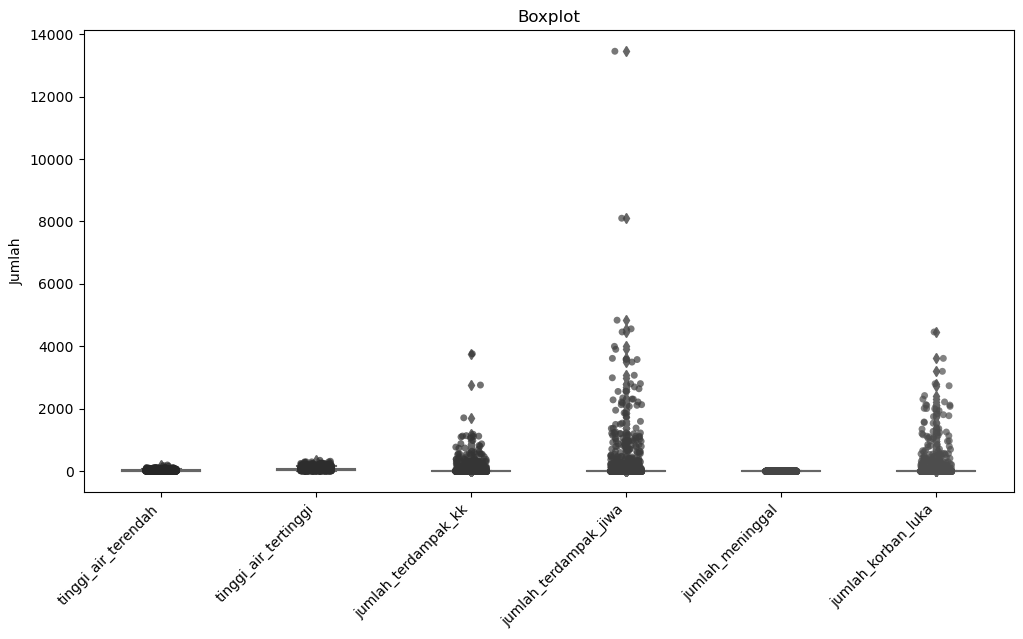

In [41]:
# Visualisasi data outlier menggunakan boxplot

kolom_boxplot = ['tinggi_air_terendah','tinggi_air_tertinggi','jumlah_terdampak_kk','jumlah_terdampak_jiwa','jumlah_meninggal','jumlah_korban_luka']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_banjir_all[kolom_boxplot], width=0.5, palette="Set3")
sns.stripplot(data=df_banjir_all[kolom_boxplot], jitter=True, color=".3", marker="o", alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot')
plt.ylabel('Jumlah')
plt.show()

In [42]:
# Walaupun ditemukan angka yang terlihat outlier namun masih masuk akal karena Kelurahan Cipinang Melayu terdiri dari 20000 Jiwa lebih

df_banjir_all[df_banjir_all["jumlah_terdampak_jiwa"]>5000]

,kota_administrasi,kecamatan,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,jumlah_korban_luka,tinggi_air_terendah,tinggi_air_tertinggi,tanggal_kejadian_banjir
642,Jakarta Timur,Makasar,Cipinang Melayu,10,18,3762,13450,0,0,0,0,2424,8,0,0,2424,15,100,2020-02-03
655,Jakarta Timur,Pulo Gadung,Kayu Putih,9,35,2761,8103,0,0,0,0,975,4,0,0,975,10,100,2020-02-08


## Pengecekan duplikat

In [43]:
df_banjir_all.duplicated().sum()

126

In [44]:
df_banjir_all[df_banjir_all.duplicated(keep=False)]

,kota_administrasi,kecamatan,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,jumlah_korban_luka,tinggi_air_terendah,tinggi_air_tertinggi,tanggal_kejadian_banjir
798,Jakarta Barat,Kembangan,Srengseng,1,1,0,0,0,0,0,0,0,0,0,0,0,30,30,2019-12-31
799,Jakarta Barat,Kembangan,Srengseng,1,1,0,0,0,0,0,0,0,0,0,0,0,30,30,2019-12-31
823,Jakarta Timur,Jatinegara,Bidara Cina,1,1,0,0,0,0,0,0,0,0,0,0,0,10,60,2019-12-01
824,Jakarta Timur,Jatinegara,Bidara Cina,1,1,0,0,0,0,0,0,0,0,0,0,0,10,60,2019-12-01
825,Jakarta Timur,Jatinegara,Bidara Cina,1,1,0,0,0,0,0,0,0,0,0,0,0,10,60,2019-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,Jakarta Timur,Makasar,Kebon Pala,1,1,0,0,0,0,0,0,0,0,0,0,0,30,30,2019-10-11
1195,Jakarta Timur,Makasar,Kebon Pala,1,1,0,0,0,0,0,0,0,0,0,0,0,50,50,2019-10-11
1196,Jakarta Timur,Makasar,Kebon Pala,1,1,0,0,0,0,0,0,0,0,0,0,0,50,50,2019-10-11
1403,Jakarta Selatan,Cilandak,Gandaria Selatan,1,1,0,0,0,0,0,0,0,0,0,0,0,30,30,2024-03-01


In [45]:
# Menghapus data duplikat

df_banjir_all = df_banjir_all.drop_duplicates()
df_banjir_all.reset_index(drop=True, inplace=True)

print(f'Jumlah baris di dataset adalah : {df_banjir_all.shape[0]}\nJumlah kolom di dataset adalah : {df_banjir_all.shape[1]}\n')
df_banjir_all.info()

Jumlah baris di dataset adalah : 1514
Jumlah kolom di dataset adalah : 19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   kota_administrasi           1514 non-null   object        
 1   kecamatan                   1514 non-null   object        
 2   kelurahan                   1514 non-null   object        
 3   jumlah_terdampak_rw         1514 non-null   int32         
 4   jumlah_terdampak_rt         1514 non-null   int32         
 5   jumlah_terdampak_kk         1514 non-null   int32         
 6   jumlah_terdampak_jiwa       1514 non-null   int32         
 7   lama_genangan               1514 non-null   int32         
 8   jumlah_meninggal            1514 non-null   int32         
 9   jumlah_hilang               1514 non-null   int32         
 10  jumlah_luka_berat           1514 non-null   i

# DATA SAVING

In [ ]:
# df_banjir_all.to_excel("namafile.xlsx", index=False)